In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy import constants

#Graphing variables
pagewidth = (8.5, 5)

In [3]:
#Function definitions

''' Plots the distributions of data as a histogram against the gaussian distribution with mean and stddev matching
    that of the data. 
'''
def plot_distribution(data, filename, title, figsize=pagewidth, bins='sturges', hrange=(-100, 100), 
                      directory='graphs/distributions/', logmode=False):
    plt.figure(figsize=figsize)
    if (hrange == (-100, 100)): hrange = (min(data), max(data))
    gspace = np.linspace(hrange[0], hrange[1], 1000)
    gnorm = norm.pdf(gspace, loc=np.mean(data), scale=np.std(data))
    if type(bins) is str: bins = len(np.histogram_bin_edges(data, bins=bins)) - 1
    gnorm *= 1000 * len(data) / (sum(gnorm) * bins)
    plt.plot(gspace, gnorm, color='orange', label='normal distribution')
    plt.hist(data, bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Frequency')
    if logmode: plt.yscale('log')
    plt.title('Distribution of Data, with frequency '+title+', # bins='+str(bins))
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

''' Sums n adjacent samples together in list data and returns a new list of size len(data)/n. 
    n should be a factor of len(data).
'''
def sum_adjacent(data, n):
    new_set = np.array([])
    for i in range(len(data)):
        np.append(new_set, sum(data[n*i:n*i+n]))

''' Plots the distributions of power data as a histogram against the chi squared distribution 
    with mean and stddev matching that of the data. 
'''
def plot_chi2(data, n, filename, title, figsize=pagewidth, bins=70, hrange=(-100, 100), 
              directory='graphs/chi2/'):
    plt.figure(figsize=figsize)
    cspace = np.linspace(hrange[0], hrange[1], 1000)
    cnorm = chi2.pdf(cspace, n, loc=np.mean(data), scale=np.std(data))
    cnorm *= 1000 * len(data) / (sum(cnorm) * bins * n)
    plt.plot(cspace, cnorm, color='orange', label='chi2 distribution, df='+str(n))
    plt.hist(sum_adjacent(data, n), bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Power Estimates, with frequency '+title)
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

In [4]:
%%time
#CPU times: user 2.98 s, sys: 5.71 s, total: 8.69 s Wall time: 49.1 s
#CPU times: user 4.32 s, sys: 11.1 s, total: 15.5 s Wall time: 3min 18s

#Load data, subtract mean
#Ended up being much faster this way then using an array

room_uhf = np.fromfile('newdata/room_UHF_100m.dat', dtype='int16')-2.**11 
room_uhf -= np.mean(room_uhf)

room_fm = np.fromfile('newdata/room_FM_100m.dat', dtype='int16')-2.**11 
room_fm -= np.mean(room_fm)

room_lte = np.fromfile('newdata/room_LTE_100m.dat', dtype='int16')-2.**11 
room_lte -= np.mean(room_lte)

boiling = np.fromfile('newdata/boiling.dat', dtype='int16')-2.**11 
boiling -= np.mean(boiling)

ice = np.fromfile('newdata/ice.dat', dtype='int16')-2.**11 
ice -= np.mean(ice)

dry_ice = np.fromfile('newdata/dry_ice.dat', dtype='int16')-2.**11 
dry_ice -= np.mean(dry_ice)

liquid_nitrogen = np.fromfile('newdata/liquid_nitrogen.dat', dtype='int16')-2.**11 
liquid_nitrogen -= np.mean(liquid_nitrogen)

CPU times: user 3.7 s, sys: 7.68 s, total: 11.4 s
Wall time: 1min 5s


In [5]:
#Title strings for graphing
filenames = ['room_UHF_100m', 'room_FM_100m', 'room_LTE_100m', 
             'boiling', #'boiling2', 'boiling3', 'boiling4',
             'ice', 'dry_ice', 'liquid_nitrogen']
titles = ['1GHz @21.9$^\circ$ C', '100MHz @21.9$^\circ$ C', '720MHz @21.9$^\circ$ C', 
          '1GHz @87.2$^\circ$ C', #'1GHz @77.1$^\circ$ C', '1GHz @61.8$^\circ$ C', '1GHz @56.6$^\circ$ C', 
          '1GHz @0.8$^\circ$ C', '1GHz @-78.5$^\circ$ C', '1GHz @-195.8$^\circ$ C']

CPU times: user 2min 13s, sys: 24.9 s, total: 2min 38s
Wall time: 5min 32s


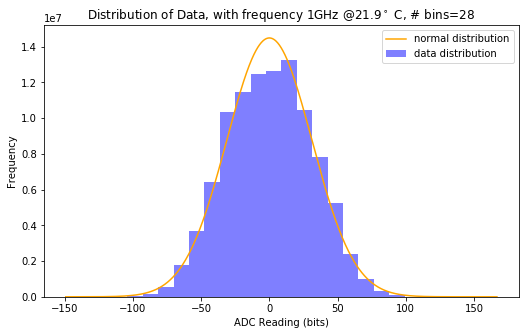

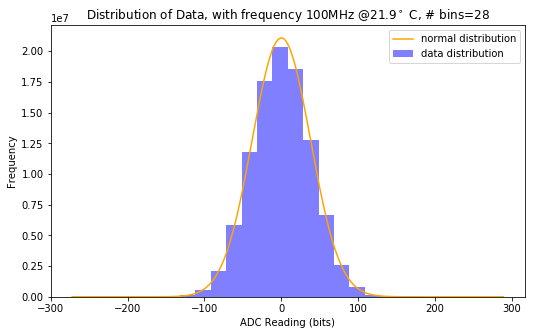

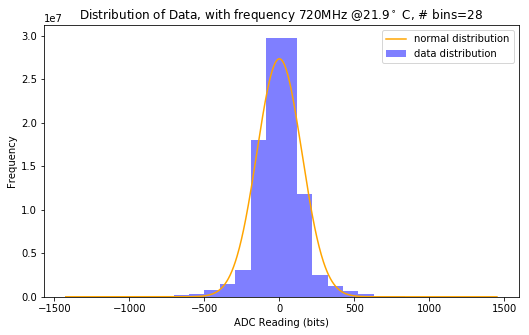

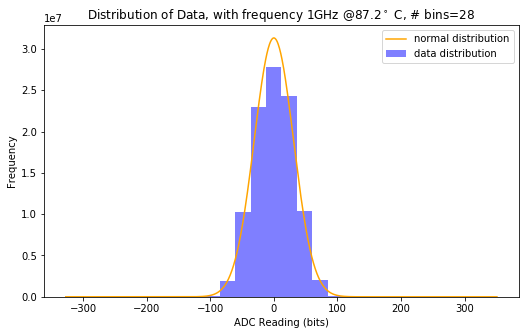

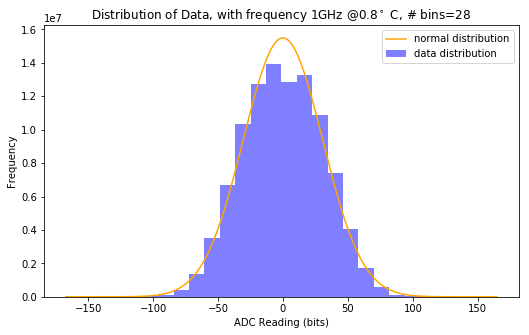

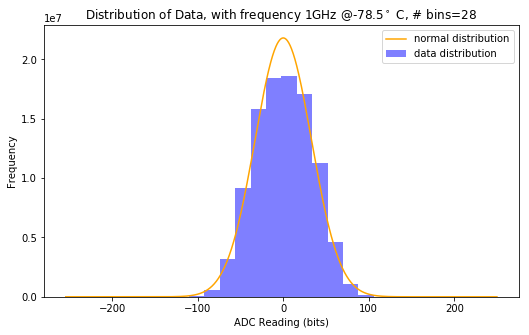

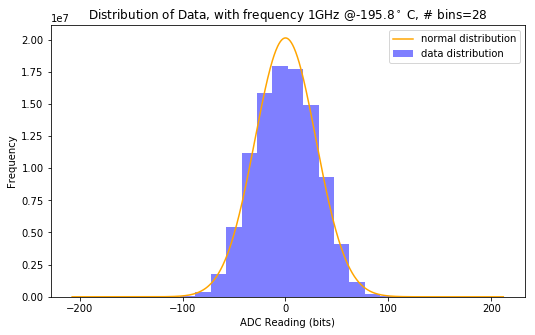

In [6]:
%%time
#CPU times: user 2min 12s, sys: 14.7 s, total: 2min 27s Wall time: 3min 18s

#Distribution graphs
plot_distribution(room_uhf, filenames[0], titles[0])
plot_distribution(room_fm, filenames[1], titles[1])
plot_distribution(room_lte, filenames[2], titles[2])
plot_distribution(boiling, filenames[3], titles[3])
plot_distribution(ice, filenames[4], titles[4])
plot_distribution(dry_ice, filenames[5], titles[5])
plot_distribution(liquid_nitrogen, filenames[6], titles[6])

CPU times: user 1min 9s, sys: 5.73 s, total: 1min 15s
Wall time: 1min 15s


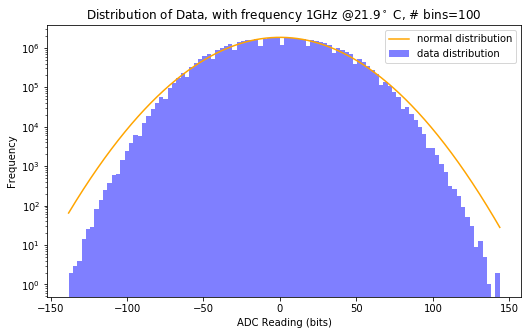

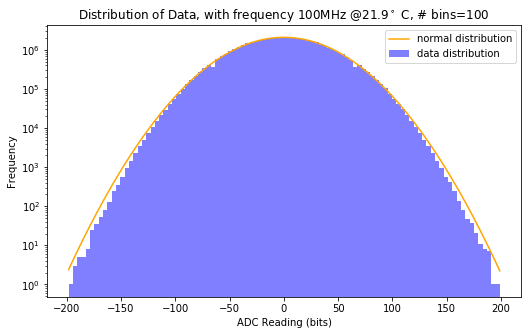

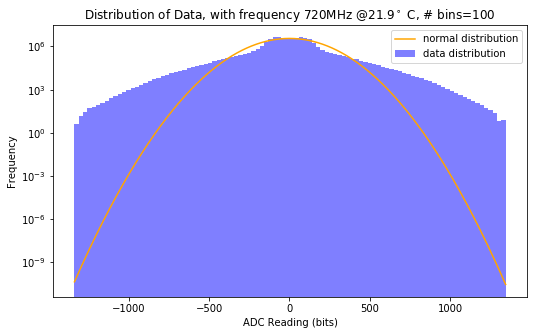

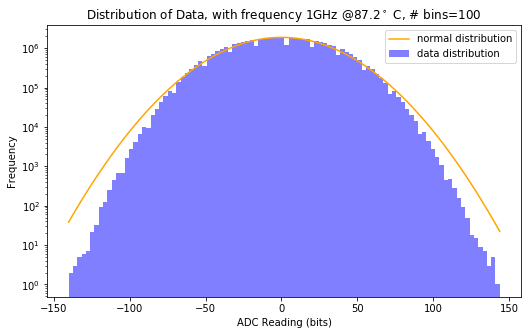

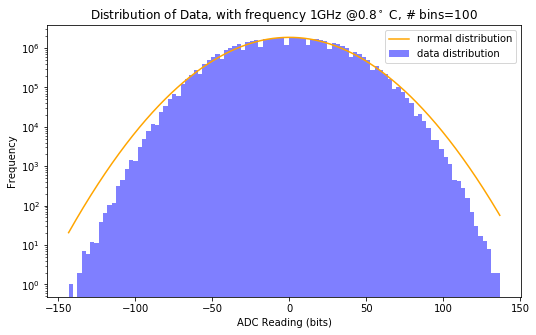

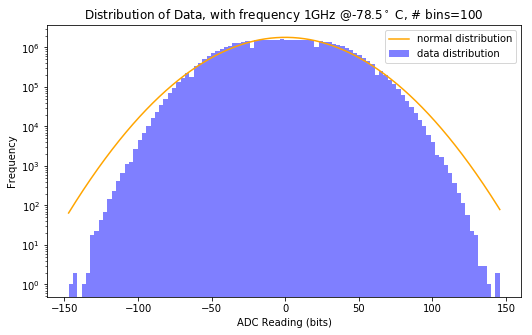

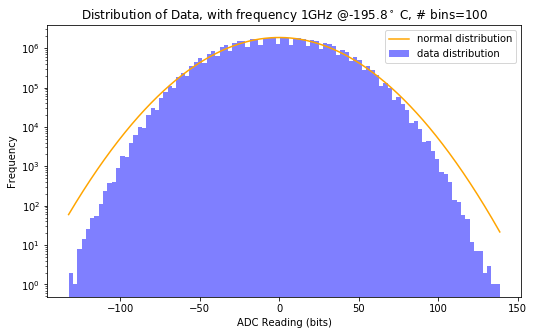

In [9]:
%%time
#CPU times: user 2min 12s, sys: 14.2 s, total: 2min 26s Wall time: 1h 7min 44s

#Distribution graphs
plot_distribution(room_uhf[50000000:], filenames[0]+'log-y', titles[0], logmode=True, bins=100)
plot_distribution(room_fm[50000000:], filenames[1]+'log-y', titles[1], logmode=True, bins=100)
plot_distribution(room_lte[50000000:], filenames[2]+'log-y', titles[2], logmode=True, bins=100)
plot_distribution(boiling[50000000:], filenames[3]+'log-y', titles[3], logmode=True, bins=100)
plot_distribution(ice[50000000:], filenames[4]+'log-y', titles[4], logmode=True, bins=100)
plot_distribution(dry_ice[50000000:], filenames[5]+'log-y', titles[5], logmode=True, bins=100)
plot_distribution(liquid_nitrogen[50000000:], filenames[6]+'log-y', titles[6], logmode=True, bins=100)

In [ ]:
%%time
#CPU times: user 1min 13s, sys: 3.79 s, total: 1min 17s Wall time: 2min 5s

power_uhf = []
for point in room_uhf:
    power_uhf.append(constants.epsilon_0 * constants.c / 2 * point**2)

In [ ]:
%%time
#CPU times: user 3.9 s, sys: 26.3 s, total: 30.2 s Wall time: 10min

#Calculate power lists
constant = constants.epsilon_0 * constants.c / 2

power_uhf = constant * room_uhf**2
power_fm = constant * room_fm**2
power_lte = constant * room_lte**2
power_b = constant * boiling**2
power_i = constant * ice**2
power_di = constant * dry_ice**2
power_ln = constant * liquid_nitrogen**2

In [ ]:
plt.figure(figsize=(8.5,5))
cspace = np.linspace(min(power), max(power), 1000)
cnorm = chi2.pdf(cspace, 1, loc=np.mean(power), scale=np.std(power))
cnorm2 = chi2.pdf(cspace, 2, loc=np.mean(power), scale=np.std(power))
cnorm4 = chi2.pdf(cspace, 4, loc=np.mean(power), scale=np.std(power))
cnorm10 = chi2.pdf(cspace, 10, loc=np.mean(power), scale=np.std(power))
cnorm100 = chi2.pdf(cspace, 100, loc=np.mean(power), scale=np.std(power))
#cnorm *= 1000 * len(data) / (sum(cnorm) * bins * n)
plt.plot(cspace, cnorm, color='orange', label='chi2 distribution, df=1')
plt.plot(cspace, cnorm2, color='blue', label='chi2 distribution, df=2')
plt.plot(cspace, cnorm4, color='red', label='chi2 distribution, df=4')
plt.plot(cspace, cnorm10, color='green', label='chi2 distribution, df=10')
plt.plot(cspace, cnorm100, color='cyan', label='chi2 distribution, df=100')
#plt.hist(sum_adjacent(data, n), bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
plt.xlabel('ADC Reading (bits)')
plt.ylabel('Frequency')
plt.xlim((1.5*np.mean(power), 10**4))
plt.ylim((10**(-6), 10**0))
plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of Power Estimates, with frequency 1GHz')
plt.legend()
plt.savefig('graphs/chi2/test.png', bbox_inches='tight')